In [379]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import Dataset


995


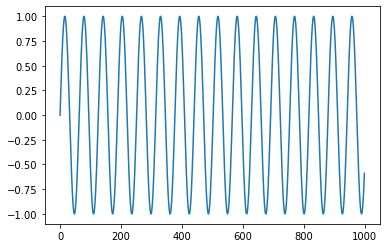

In [380]:
# #import data from CDC
# df = pd.read_csv("data\FluViewPhase2Data\WHO_NREVSS_Combined_prior_to_2015_16.csv")

# #split into training data and test data
# train = df
# # test = df[df["YEAR"]>2012]

# #turn data into features and output
# #features: 5 previous + one from last year for predicted
# #output: prediction for next time

# #create test data
# shift = 52
# train_X = np.empty([5,len(train)-shift],dtype=int)
# train_y = np.empty([1,len(train)-shift],dtype=int)
# train_Data = []
# for i in range(shift,len(train)):
#     train_X[:,i-shift] = np.asarray(train.iloc[[i-1,i-2,i-3,i-4,i-52]]["TOTAL"]).T
#     train_y[:,i-shift] = train.iloc[[i]]["TOTAL"]
#     train_Data.append((train_X,train_y))
# print(train_X[:,0])
# print(train_y[:,0])
#import data from CDC
# df = pd.read_csv("data\FluViewPhase2Data\WHO_NREVSS_Combined_prior_to_2015_16(1).csv")
# series = df["TOTAL"]
# #turn data into features and output
# #features: 5 previous + one from last year for predicted
# #output: prediction for next time

# #create test data


# from pandas import read_csv
# from matplotlib import pyplot
# from statsmodels.graphics.tsaplots import plot_acf
# plot_acf(series, lags=31)
# pyplot.show()

series = np.sin(.1*np.arange(1000))
plt.plot(series)
T=5
X = np.empty([5,len(series)-T])
Y = np.empty([1,len(series)-T])
for i in range(len(series)-T):
    X[:,i] = np.asarray(series[i:i+T])
    Y[:,i] = series[i+T]
print(Y.shape[1])
# TRY WITH SINE


Try with sin

In [381]:
class sinDataset(Dataset):
    def __init__(self):
        series = np.sin(.1*np.arange(1000))
        T=5
        X = np.empty([5,len(series)-T],dtype=np.float32)
        Y = np.empty([1,len(series)-T],dtype=np.float32)
        for i in range(len(series)-T):
            X[:,i] = np.asarray(series[i:i+T])
            Y[:,i] = series[i+T]
        self.X=torch.from_numpy(X)
        self.Y=torch.from_numpy(Y)
    def __len__(self):
        return self.Y.shape[1]
    def __getitem__(self,idx):
        return self.X[:,idx].T, self.Y[:,idx]

In [382]:
data = sinDataset()
training_data_sin, testing_data_sin = torch.utils.data.random_split(data,[.7,.3])
train_dataloader_sin = DataLoader(training_data_sin,batch_size=64,shuffle=True)
test_dataloader_sin = DataLoader(testing_data_sin,batch_size=64,shuffle=True)

In [383]:
# create neural netowrk
class NeuralNetworkSin(nn.Module):
    def __init__(self):
        super(NeuralNetworkSin, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(5, 3),
            nn.Sigmoid(),
            nn.Linear(3, 1),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model_sin = NeuralNetworkSin()

In [384]:
#train/test loop
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)
        print(pred)
        # print(y)
        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % size == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            # print(y)
            pred = model(X)
            # print(pred)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: Avg loss: {test_loss:>8f} \n")
    # print(pred)

In [385]:
learning_rate = .001
batch_size = 64
epochs = 1
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model_sin.parameters(), lr=learning_rate)

# print(list(model_sin.parameters()))
for t in range(epochs):
    # print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader_sin, model_sin, loss_fn, optimizer)
    test_loop(test_dataloader_sin, model_sin, loss_fn)
print("Done!")
# print(list(model.parameters()))

tensor([[0.5570],
        [0.5031],
        [0.4970],
        [0.5220],
        [0.5824],
        [0.4757],
        [0.4868],
        [0.4731],
        [0.4722],
        [0.5237],
        [0.4753],
        [0.4715],
        [0.4807],
        [0.5936],
        [0.5302],
        [0.4960],
        [0.5130],
        [0.4790],
        [0.6404],
        [0.5000],
        [0.4715],
        [0.4831],
        [0.5863],
        [0.4775],
        [0.6419],
        [0.5406],
        [0.5124],
        [0.4918],
        [0.4714],
        [0.5553],
        [0.5893],
        [0.4924],
        [0.4868],
        [0.4974],
        [0.5614],
        [0.4714],
        [0.5015],
        [0.4714],
        [0.5999],
        [0.4825],
        [0.6063],
        [0.5123],
        [0.6252],
        [0.4766],
        [0.6195],
        [0.4990],
        [0.5881],
        [0.4900],
        [0.4884],
        [0.6185],
        [0.4715],
        [0.5479],
        [0.6263],
        [0.5181],
        [0.6124],
        [0

_______________________________________________________________________________-

In [386]:
#torch data set
class dataSetAll(Dataset):
    def __init__(self, yearLow, yearHigh):
        #import data from CDC
        self.df = pd.read_csv("data\FluViewPhase2Data\WHO_NREVSS_Combined_prior_to_2015_16.csv")
        self.df = self.df[(yearLow <= self.df["YEAR"]) & (self.df["YEAR"] < yearHigh)]
        #turn data into features and output
        #features: 5 previous + one from last year for predicted
        #output: prediction for next time

        #create test data
        shift = 5
        self.X = np.empty([5,len(self.df)-shift],dtype=np.float32)
        self.Y = np.empty([1,len(self.df)-shift],dtype=np.float32)
        for i in range(shift,len(self.df)):
            self.X[:,i-shift] = np.asarray(self.df.iloc[[i-5,i-4,i-3,i-2,i-1]]["TOTAL"])
            self.Y[:,i-shift] = self.df.iloc[[i]]["TOTAL"]

        self.X = torch.from_numpy(self.X)
        self.Y = torch.from_numpy(self.Y)

    def __len__(self):
        return self.Y.shape[1]
    
    def __getitem__(self,idx):
        return self.X[:,idx].T, self.Y[:,idx]

In [387]:
#create data loaders
training_data = dataSetAll(1900,2013)
test_data = dataSetAll(2013,2100)
train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

In [388]:
# create neural netowrk
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(5, 10),
            nn.Sigmoid(),
            nn.Linear(10, 1),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork()

In [389]:
#train/test loop
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)
        # print(pred)
        # print(y)
        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % size == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            # print(X)
            pred = model(X)
            print(pred)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error:\nAvg loss: {test_loss:>8f} \n")

In [390]:
learning_rate = .001
batch_size = 64
epochs = 500
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# print(list(model.parameters()))
for t in range(epochs):
    # print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")
# print(list(model.parameters()))

loss: 7584756.000000  [    0/  788]
tensor([[517.2952],
        [517.2952],
        [517.2952],
        [517.2952],
        [517.2952],
        [517.2952],
        [517.2952],
        [517.2952],
        [517.2952],
        [517.2952],
        [517.2952],
        [517.2952],
        [517.2952],
        [517.2952],
        [517.2952],
        [517.2952],
        [517.2952],
        [517.2952],
        [517.2952],
        [517.2952],
        [517.2952],
        [517.2952],
        [517.2952],
        [517.2952],
        [517.2952],
        [517.2952],
        [517.2952],
        [517.2952],
        [517.2952],
        [517.2952],
        [517.2952],
        [517.2952],
        [517.2952],
        [517.2952],
        [517.2952],
        [517.2952],
        [517.2952],
        [517.2952],
        [517.2952],
        [517.2952],
        [517.2952],
        [517.2952],
        [517.2952],
        [517.2952],
        [517.2952],
        [517.2952],
        [517.2952],
        [517.2952],
    

KeyboardInterrupt: 